### Assignment 4 - Part 2

#### Solution 2. 

In [1]:
!pip install wikipedia
!pip install statsmodels --upgrade

In [2]:
import pandas as pd
import wikipedia

articles=['anomaly detection', 'cluster analysis', 'k-means clustering', 'data warehouse', 'market basket analysis', 'association rule learning']
wiki_lst=[]
title=[]

for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)

loading content:  anomaly detection
loading content:  cluster analysis
loading content:  k-means clustering
loading content:  data warehouse
loading content:  market basket analysis
loading content:  association rule learning


#### Printing first retreived entry

In [3]:
print(wiki_lst[0])

In data analysis, anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behaviour. Such examples may arouse suspicions of being generated by a different mechanism, or appear inconsistent with the remainder of that set of data.Anomaly detection finds application in many domains including cyber security, medicine, machine vision, statistics, neuroscience, law enforcement and financial fraud to name only a few. Anomalies were initially searched for clear rejection or omission from the data to aid statistical analysis, for example to compute the mean or standard deviation. They were also removed to better predictions from models such as linear regression, and more recently their removal aids the performance of machine learning algorithms. However, in many 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature

(6, 3192)


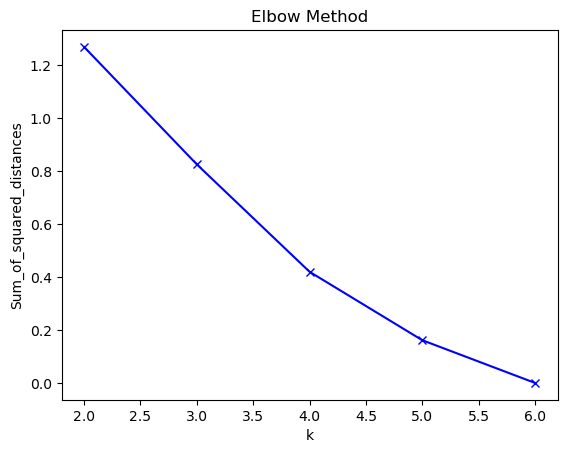

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

#### Fit k-means model with k=3

In [6]:

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
1           cluster analysis        0
2         k-means clustering        0
4     market basket analysis        0
5  association rule learning        0
0          anomaly detection        1
3             data warehouse        1


#### Solution 3.

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


<AxesSubplot:xlabel='Date'>

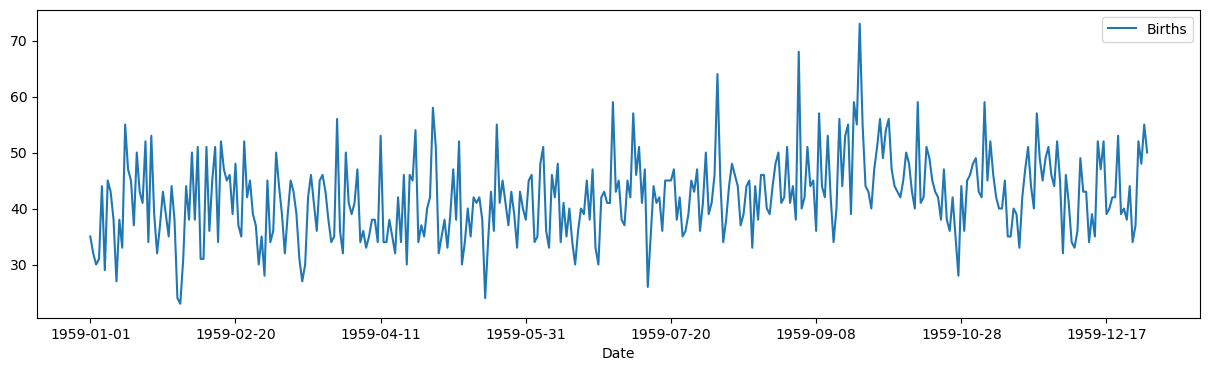

In [7]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

series = read_csv('births.csv', header=0, index_col=0)

print(series.head())
series.plot(figsize=(15,4))

#### Perform trailing moving average smoothing & plotting original and transformed dataset

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03        NaN
1959-01-04        NaN
1959-01-05        NaN
1959-01-06        NaN
1959-01-07  35.142857
1959-01-08  36.285714
1959-01-09  37.142857
1959-01-10  36.714286


<AxesSubplot:title={'center':'smoothed timeseries'}, xlabel='Date'>

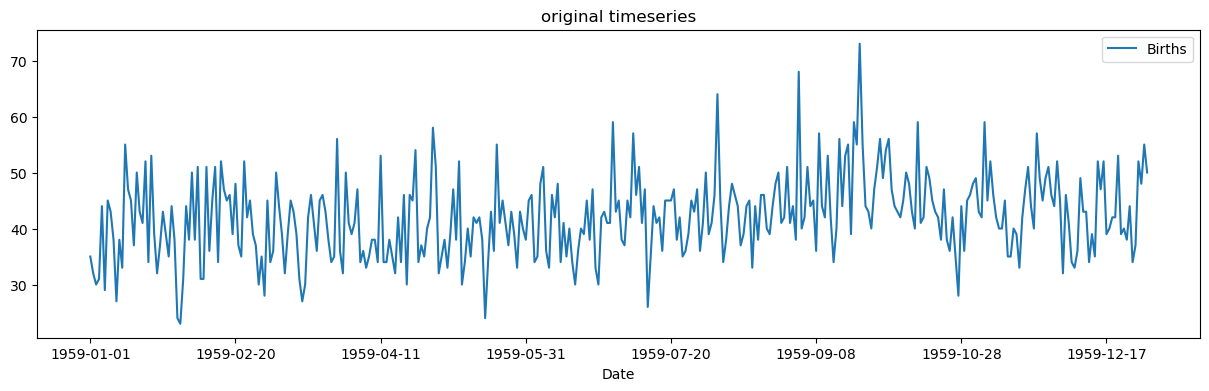

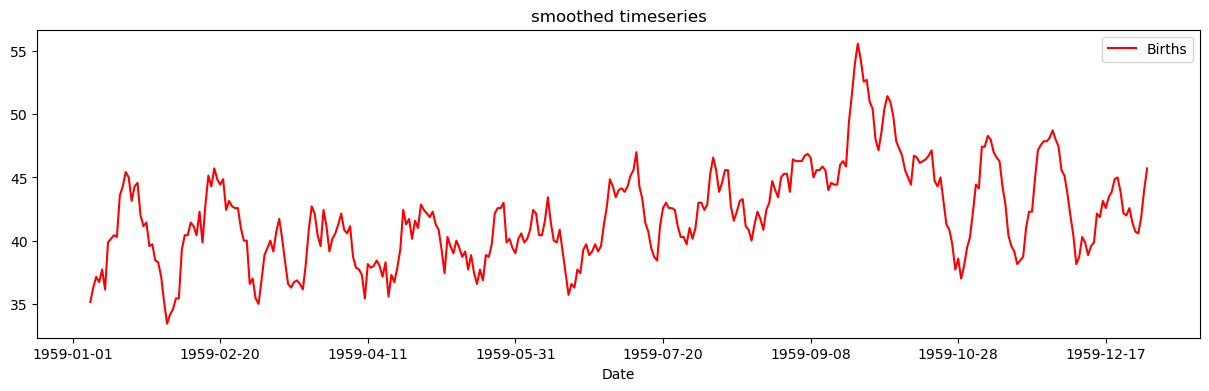

In [8]:

rolling = series.rolling(window=7) # using a window of 3 samples: t, t-1, t-2
rolling_mean = rolling.mean()
print(rolling_mean.head(10))


series.plot(figsize=(15,4),title='original timeseries')
rolling_mean.plot(color='red', figsize=(15,4),title='smoothed timeseries')

In [9]:
rolling_mean['Births'] = rolling_mean['Births'].replace(np.nan, 0)
print(rolling_mean)

               Births
Date                 
1959-01-01   0.000000
1959-01-02   0.000000
1959-01-03   0.000000
1959-01-04   0.000000
1959-01-05   0.000000
...               ...
1959-12-27  40.714286
1959-12-28  40.571429
1959-12-29  41.857143
1959-12-30  44.000000
1959-12-31  45.714286

[365 rows x 1 columns]


#### Fit Autoregressive model & Prediction

In [10]:

from statsmodels.tsa.ar_model import AutoReg


model = AutoReg(rolling_mean, lags=2,old_names=False) # "lags" indicates the model order
model_fit = model.fit()


yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) # arguments denote which dataset indices to predict
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


#### Fit ARMA Model & Prediction

In [11]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(rolling_mean, order=(2, 0, 2)) # p=2, q=2
model_fit = model.fit()


yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) # arguments denote which dataset indices to predict
print(yhat)

C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1960-01-01    45.810248
1960-01-02    45.818768
1960-01-03    45.728095
1960-01-04    45.564019
1960-01-05    45.347309
Freq: D, Name: predicted_mean, dtype: float64
